## (Loan Data from Prosper)
## by (Abanob Morgan)




## Investigation Overview
> The overall goals of visulaizing the loan data in this project:
        >+ What affects the borrower’s APR or interest rate?
        >+ Are there differences between loans depending on how large the original loan amount was?


## Dataset Overview
> this data about banking loan in USA this data has 113,937  loans rows  with 81 variables columns for each data record (loan), including loan amount, borrower rate (or interest rate) loan term , current loan status, borrower income, and many others



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_df.csv')
df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
0,193129,2007-08-26 19:09:29.263,36,Completed,9425,0.16516,0.1580,0,CO,3083.333333,...,True,True,3.0,0.17,330.43,11.0,258,"$25,000-49,999",6.0,4.0
1,1209647,2014-02-27 08:28:07.900,36,Current,10000,0.12016,0.0920,2,CO,6125.000000,...,False,False,5.0,0.18,318.93,29.0,1,"$50,000-74,999",7.0,14.0
2,658116,2012-10-22 11:02:35.010,36,Current,10000,0.12528,0.0974,16,GA,2875.000000,...,True,False,1.0,0.15,321.45,26.0,158,"$25,000-49,999",9.0,5.0
3,909464,2013-09-14 18:38:39.097,36,Current,15000,0.24614,0.2085,2,MN,9583.333333,...,True,False,9.0,0.26,563.97,39.0,20,"$100,000+",4.0,19.0
4,1074836,2013-12-14 08:26:37.093,60,Current,15000,0.15425,0.1314,1,NM,8333.333333,...,True,False,2.0,0.36,342.37,47.0,1,"$100,000+",10.0,17.0


## (Distribution Plots of Borrower Rate, Loan Original Amount, and Prosper Score)

Borrower Rate has a uninomial-normal distribution from 0 uto 0.4 on a standard scale. However Loan Original Amount has a Binomial distribution on a log scale and takes on a very large range of values, from about 1k at the lowest, to about 3.6k at the highest. It is also interesting to know that most of people has a Prosper Score between 4 and 8.  


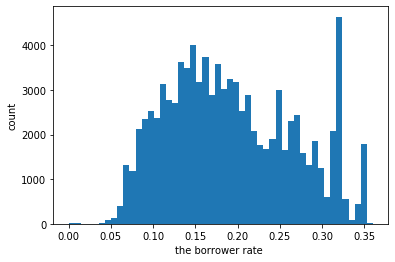

In [5]:
# Histogramm  BorrowerRate (Borrower's interest rate for this loan)
# what is borrower rate and why it is important for the data and how this data was distributed?
log_binsize = 0.125
bins = 10 ** np.arange(3.0, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df, x= 'BorrowerRate', bins= 50);
plt.xlabel('the borrower rate ')
plt.ylabel('count')
plt.show()

###  what is the most demanded loan amount and how the loan amount destriburted 

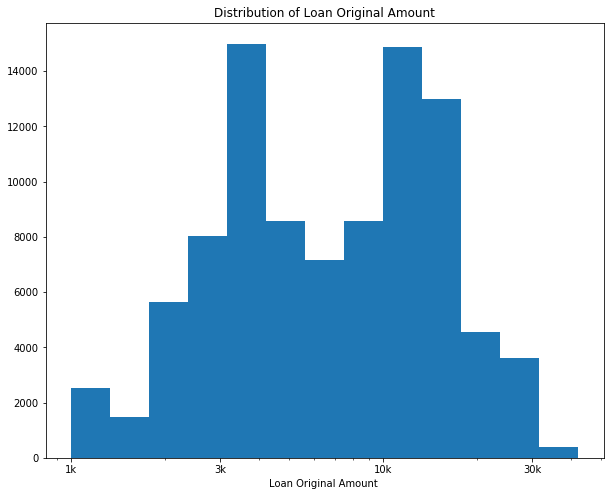

In [7]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.125
# To find the min and max use:
bins = 10 ** np.arange(3.0, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
# min is: 3.000000 and max is: 4.544068. 
# so ticks could be calculated by min= 10**3.000000=1000 and max= 10**4.5=30000
ticks=[1000, 3000, 10000, 30000]
labels=["1k", "3k", "10k","30k"]
plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Loan Original Amount ')
plt.title("Distribution of Loan Original Amount")
plt.show()



### what is the most prosper score in the data, and what the the shape of prosper score in the data? 


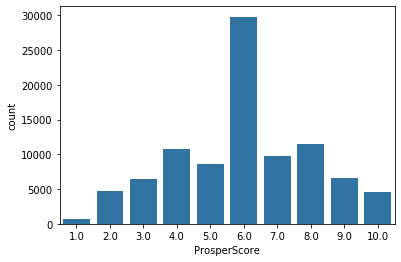

In [9]:
#plotting the prosper score hist 
color_base= sns.color_palette()[0]
sns.countplot(data= df, x = 'ProsperScore', color= color_base)
plt.xlabel('ProsperScore')
plt.show()
# as we find here in this data the most common prosper score is 6, and the data almost has a nurmal distribution 

## Distribution of Prosper Score in different Employment Status and Income Ranges
Plot 1: the emplyed people are the most populated loan borrowers no matter what is their Prosper Score. If their Prosper Score is between 4 and 8, the the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000.

Plot 2: In ProsperScore of 2 to 10, the number of loaners who has a salary of 25-49k and 50-74k is more than others and if the Prosper Score is between 4 and 8, the popluation of both salries of 25-49k and 50-74k ranges are above 2500.



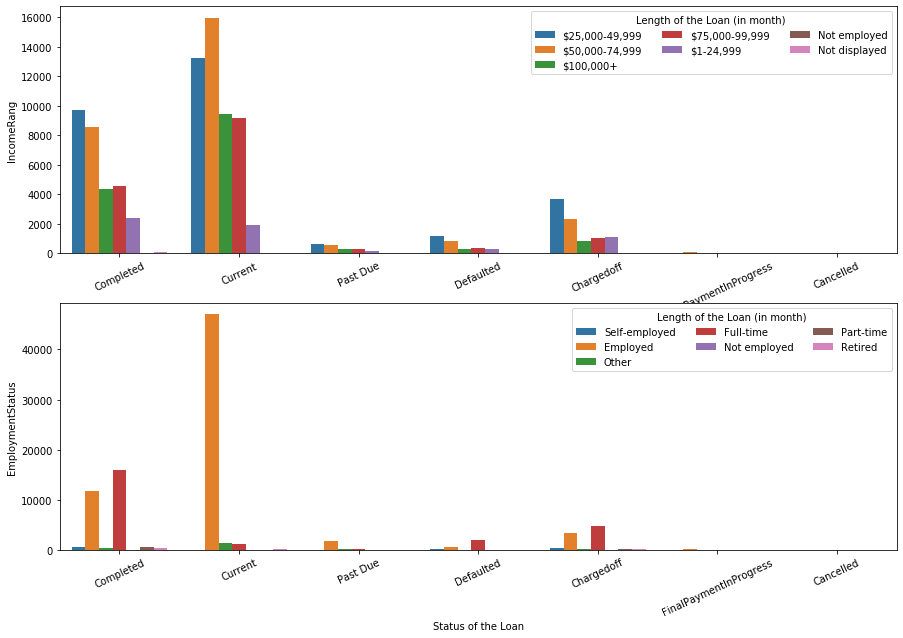

In [18]:
#plotting the relation between loan status and IncomeRang variabels  with help of a clusterd bar chart
# finding the importance of the income for the loan status and how the loan get an effect by the customr income 
# such as, the people they have a huge salary they almost didn't go to apply for a loan, and the people with no income 
# they also did not get loans, but the ones with good salary they get they loans and pay it off easly 
plt.figure(figsize = [15,10])
plt.subplot(2,1,1)
ax = sns.countplot(data = df, x = 'LoanStatus', hue = df.IncomeRange)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("IncomeRang");

#plotting the relation between loan status and EmploymentStatus variabels  with help of a clusterd bar chart
# in this section we show the relation of the emply status for the ones the want a loan and if they have a staple that mean 
# they will have the abilty to pay-off the bank loan
plt.subplot(2,1,2)
ax = sns.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus')
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("EmploymentStatus");

### Loan Original Amount vs. Borrower Rate
The graph shows that by increasing Loan Original Amount, Borrower Rate decreases

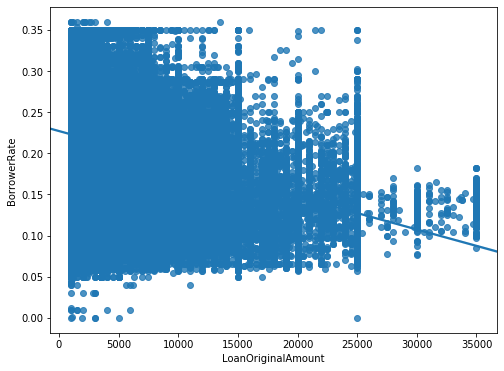

In [21]:
# scatter plot of BorrowerRate (numeric) vs. LoanOriginalAmount (numeric)
sample=np.random.choice(df.shape[0],2000, replace=False)
loans_noNAN_subset=df.loc[sample]
plt.figure(figsize = [8, 6])
sns.regplot(data = df, x = 'LoanOriginalAmount', y= 'BorrowerRate')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.show()



#### BorrowerRate at Different Income Ranges
The plot of the full data using a violin plot suggests that changing income range does not affect the borrow rate and the mean of all borrow rates in different income ranges is

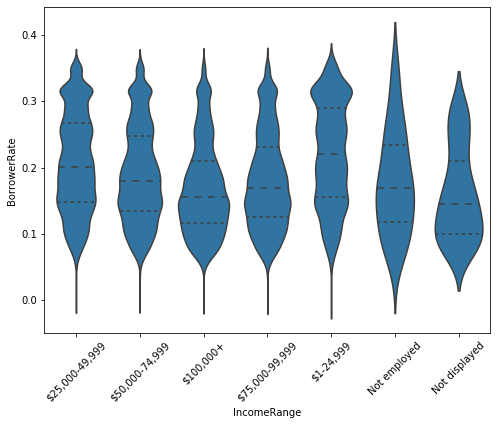

In [24]:
# violin plot of BorrowerRate (numeric) vs. IncomeRange (categoric_vars)
plt.figure(figsize = [8, 6])
base_color=sns.color_palette()[0]
sns.violinplot(data = df, x = 'IncomeRange', y= 'BorrowerRate',color=base_color, inner="quartile");
plt.xticks(rotation=45);

## (Effect of Income Range on Loan Original Amount and Borrower Rate Relationship)
It seems by increasing the Loan Original Amount, both Borrower Rate and Income Range decrease. Besides, apparently only those who has a Income Range above \$100k, are borrowing higher Loan Original Amount (>$25000) and their Borrower Rate is <0.15.



In [33]:
sample=np.random.choice(df.shape[0],1000, replace=False)
loans_noNAN_subset=df.loc[sample]
loans_noNAN_subset

,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
21015,201495,2007-09-13 15:27:25.173,36,Defaulted,25000,0.17722,0.1700,0,CA,6666.666667,...,True,False,9.0,0.32,891.32,16.0,515,"$75,000-99,999",6.0,8.0
46038,660549,2012-10-25 20:23:17.783,12,Completed,12200,0.22709,0.1493,1,CA,12166.666667,...,False,False,2.0,0.18,1100.75,27.0,217,"$100,000+",8.0,9.0
18752,681606,2012-12-03 08:16:20.587,36,Current,4000,0.29537,0.2566,7,NY,4666.666667,...,False,False,5.0,0.13,160.44,11.0,68,"$50,000-74,999",7.0,3.0
77576,378283,2008-08-05 13:21:15.750,36,Completed,18000,0.19881,0.1915,1,NJ,3517.083333,...,True,False,7.0,0.42,661.17,39.0,182,"$25,000-49,999",6.0,15.0
64786,489535,2010-12-31 09:37:44.107,36,Completed,7500,0.31308,0.2775,1,CO,4966.166667,...,True,False,5.0,0.18,309.21,24.0,11,"$50,000-74,999",7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91000,1176043,2014-02-22 15:17:11.587,60,Current,18000,0.18580,0.1620,1,AZ,10291.666667,...,True,False,5.0,0.24,439.64,51.0,1,"$100,000+",8.0,22.0
65627,259642,2008-01-03 16:48:12.200,36,Chargedoff,5000,0.34700,0.3390,1,GA,2572.250000,...,False,False,12.0,0.13,223.08,13.0,69,"$25,000-49,999",6.0,8.0
90359,848730,2013-07-23 14:54:53.700,60,Current,13000,0.18136,0.1579,14,AZ,5833.333333,...,True,False,11.0,0.30,314.69,59.0,89,"$50,000-74,999",5.0,24.0
47579,871824,2013-08-16 15:02:32.377,36,Current,3100,0.14348,0.1153,1,IL,6000.000000,...,True,False,2.0,0.03,102.27,13.0,1,"$50,000-74,999",7.0,5.0


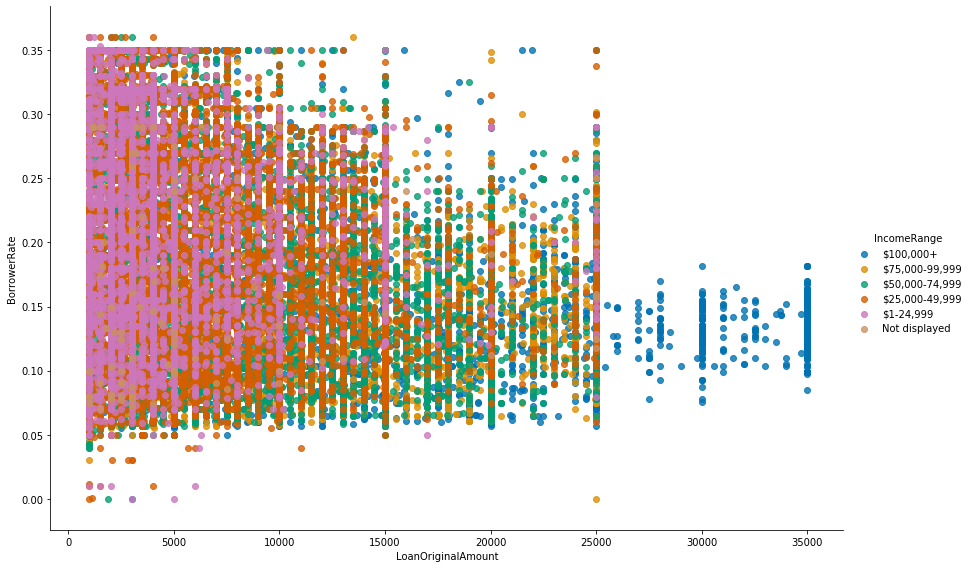

In [34]:
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sns.FacetGrid(data=df,hue="IncomeRange",hue_order=IncomeRange_order,
               size=8, aspect=1.5,palette="colorblind")
g=g.map(sns.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.2,fit_reg=False);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");
plt.show()

### Effect of Income Range on Prosper Score and Borrower Rate Relationship
In general, increasing ProsperScore decreases BorrowerRate. Apperntly, people with lower IncomeRange have higher Borrower Rate at each individual Prosper Score

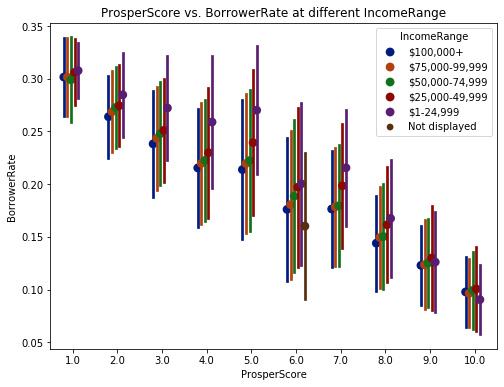

In [36]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange',
                  hue_order=IncomeRange_order, palette = 'dark', linestyles = '', dodge = 0.4, ci="sd")# 
plt.title('ProsperScore vs. BorrowerRate at different IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show();

In [1]:
!jupyter nbconvert \dat-analylsis-advance\visualization\project\slide_deck_template.ipynb --to output_toggle.tpl --post serve

[NbConvertApp] WARNING | pattern '\\dat-analylsis-advance\\visualization\\project\\slide_deck_template.ipynb' matched no files
[NbConvertApp] ERROR | Error importing output_toggle.tpl
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\exporters\base.py", line 107, in get_exporter
    return import_item(name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\utils\importstring.py", line 34, in import_item
    module = __import__(package, fromlist=[obj])
ModuleNotFoundError: No module named 'output_toggle'
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_